### PROYECTO 1 - ETAPA 1
**GRUPO 2:** \
Juana Mejía \
Daniela Espinosa 202022615 \
Panblo Ortega

#### Carga de datos

In [1]:
import pandas as pd
df = pd.read_excel('ODScat_345.xlsx')
df.shape

(4049, 2)

#### Perfilamiento de los Datos


In [2]:
# Estadisticas descriptivas
df.describe()

,sdg
count,4049.000000
mean,4.051124
std,0.814338
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


El describe nos da información sobre la única variable numérica, sin embargo, debemos recordar que esta variable es una categoria codificada. Por este motivo la media, desviación y percentiles no resultan muy útiles. El count nos dice el número de valores que tiene la columna.

In [3]:
# Informacion del data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


Como podemos ver, el dataframe no tiene valores nulos.

In [4]:
# Análisis de duplicados
duplicates = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicates}")


Número de registros duplicados: 0


Tampoco tiene duplicados.

In [5]:
levels = df.apply(pd.Series.unique)
num_levels = df.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Textos_espanol    [Por ejemplo, el nÃºmero de consultas externas...
sdg                                                       [3, 4, 5]
dtype: object
Textos_espanol    4049
sdg                  3
dtype: int64


La columna sdg contiene valores numéricos y tiene tres ategorías: [3, 4, 5]
Todos los valores de Textos_espanol son de texto y son diferentes.

#### Limpieza de datos

In [6]:
data = df.copy()

In [7]:
# Normalización de textos
data['Textos_espanol'] = data['Textos_espanol'].str.lower()
data['Textos_espanol'] = data['Textos_espanol'].str.replace('[^\w\s]', '', regex=True)

#### Vectorización de textos
Encontrar el número óptimo del máximo de features:

Mejor número de max_features: 8000


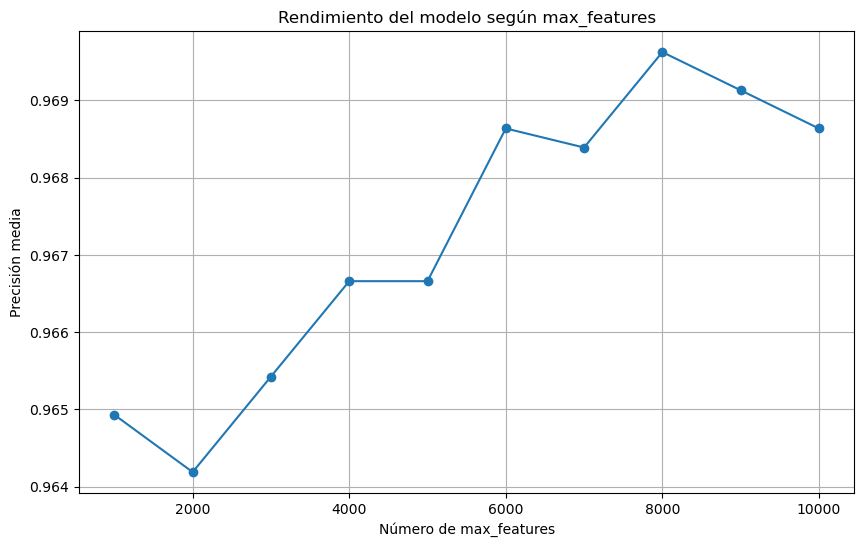

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, accuracy_score
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Cargar las palabras de parada en español
spanish_stopwords = stopwords.words('spanish')

# Definir el pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=spanish_stopwords)),
    ('clf', MultinomialNB())
])

# Definir el rango de parámetros para buscar
param_grid = {
    'tfidf__max_features': [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(accuracy_score))

# Ajustar el modelo con el GridSearchCV
grid_search.fit(data['Textos_espanol'], data['sdg'])

# Mejor número de max_features
best_max_features = grid_search.best_params_['tfidf__max_features']
print(f"Mejor número de max_features: {best_max_features}")

# Obtener los resultados de precisión media para cada valor de max_features
mean_scores = grid_search.cv_results_['mean_test_score']

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(param_grid['tfidf__max_features'], mean_scores, marker='o', linestyle='-')
plt.xlabel('Número de max_features')
plt.ylabel('Precisión media')
plt.title('Rendimiento del modelo según max_features')
plt.grid(True)
plt.show()



Vectorizar el texto

In [9]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar las palabras de parada en español
spanish_stopwords = stopwords.words('spanish')

# Vectorización de textos
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords, max_features=best_max_features)
text_vectors = vectorizer.fit_transform(data['Textos_espanol'])
text_data = pd.DataFrame(text_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenar con el dataset original
data = pd.concat([data.drop(columns=['Textos_espanol']), text_data], axis=1)
data

,sdg,000,01,016,02,03,04,05,06,07,...,últimas,último,últimos,única,únicamente,únicas,único,únicos,útil,útiles
0,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,3,0.0,0.0,0.0,0.0,0.184249,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4045,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4046,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4047,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


#### Separar los datos en train y test

In [10]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = data.drop(columns=['sdg'])
Y = data[['sdg']]


mapping = {3: 0, 4: 1, 5: 2}
Y = Y['sdg'].map(mapping)


# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#### Implementación de modelos


KNN:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.93      0.96      0.95       268
           2       0.96      0.94      0.95       292

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810



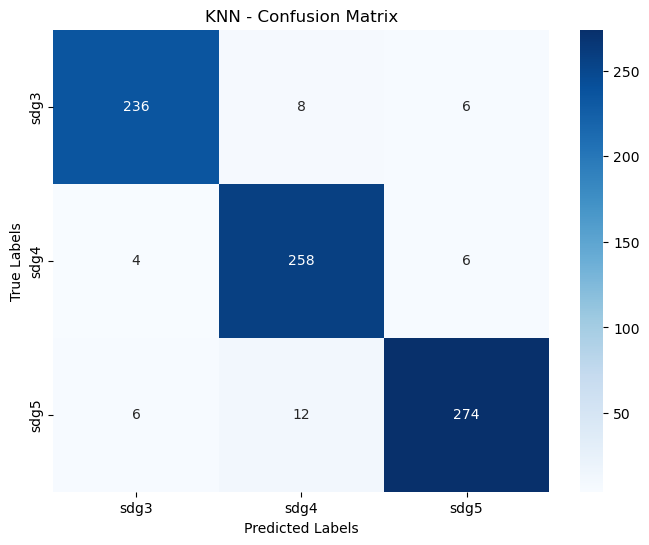


Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       250
           1       0.96      0.98      0.97       268
           2       0.97      0.98      0.97       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



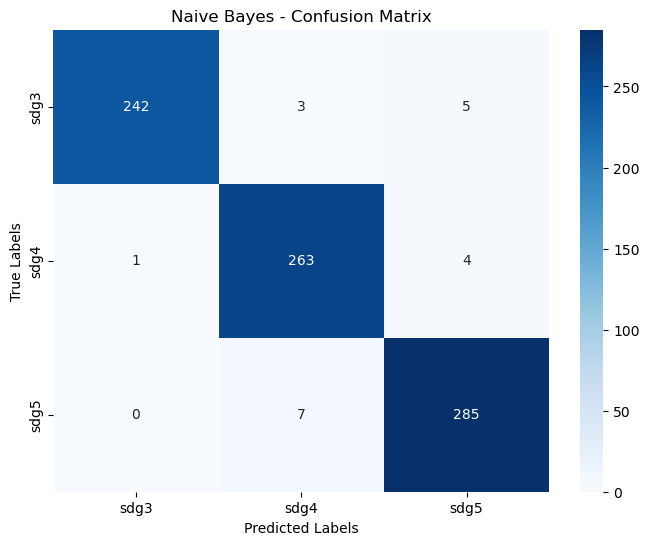


Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       250
           1       0.96      0.97      0.97       268
           2       0.98      0.96      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



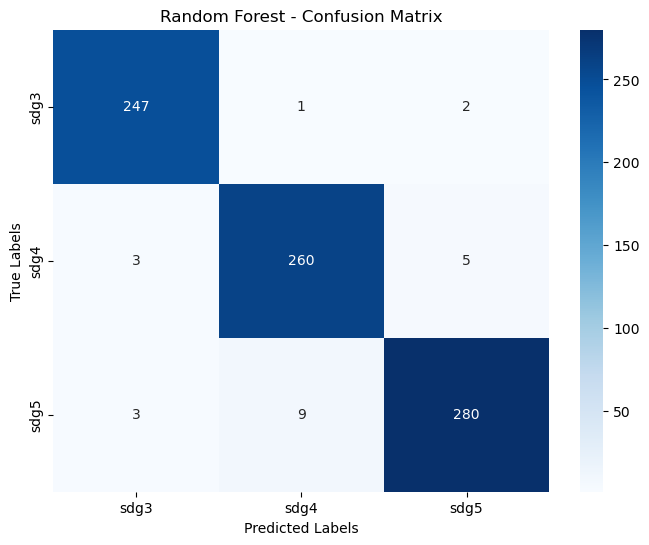


XGboost:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       250
           1       0.97      0.94      0.95       268
           2       0.96      0.96      0.96       292

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810



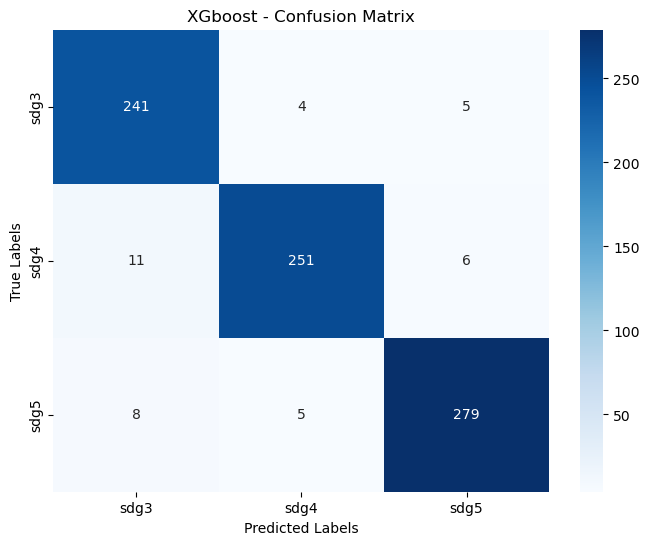


NeuralNet:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       250
           1       0.96      0.98      0.97       268
           2       0.97      0.97      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



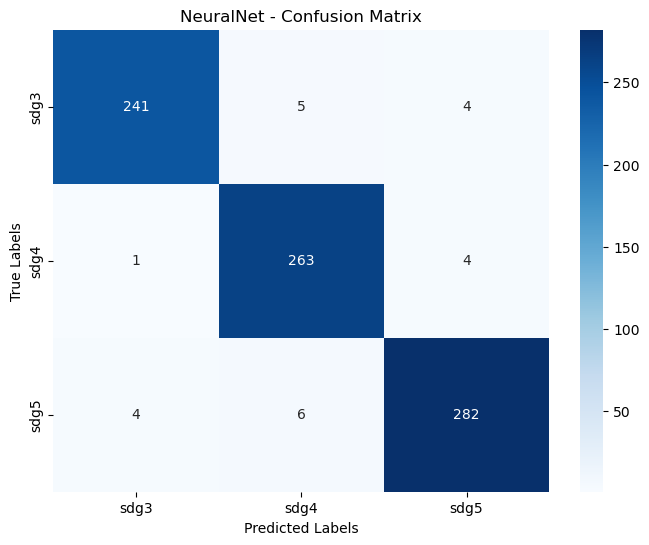

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definir los modelos en un diccionario
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'XGboost': XGBClassifier(),
    'NeuralNet': MLPClassifier()
}

# Recorrer los modelos
for name, model in models.items():
       
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['sdg3', 'sdg4', 'sdg5'], yticklabels=['sdg3', 'sdg4', 'sdg5'])
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()
    


### Construcción del modelo con optimización de hiperparámetros ###


KNN Classifier Report (Best Model):
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       250
           1       0.96      0.97      0.96       268
           2       0.96      0.96      0.96       292

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



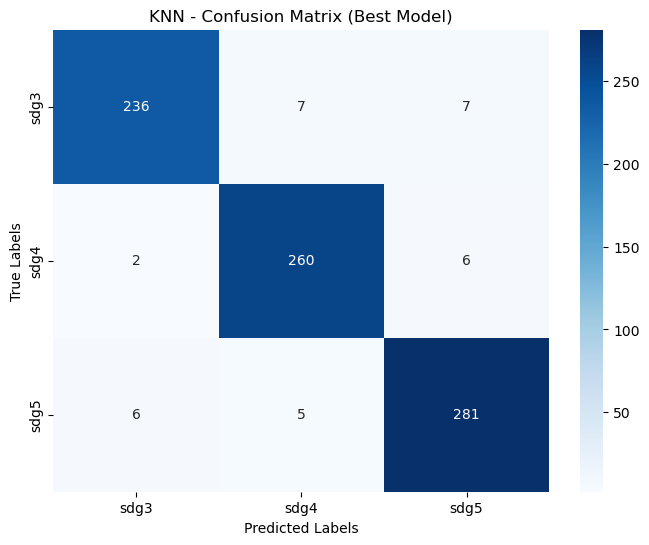

Best hyperparameters for KNN: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
Exactitud sobre test: 0.96

Naive Bayes Classifier Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       250
           1       0.96      0.98      0.97       268
           2       0.97      0.98      0.97       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



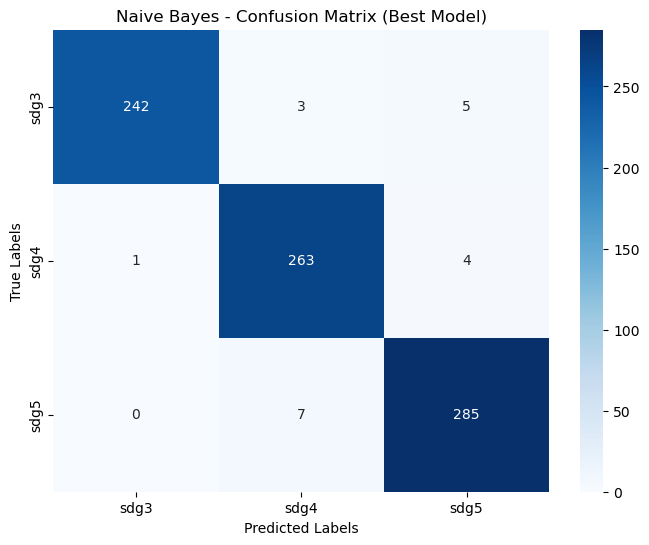

Best hyperparameters for Naive Bayes: {'alpha': 1.0}
Exactitud sobre test: 0.98

Random Forest Classifier Report (Best Model):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       250
           1       0.96      0.97      0.96       268
           2       0.96      0.96      0.96       292

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



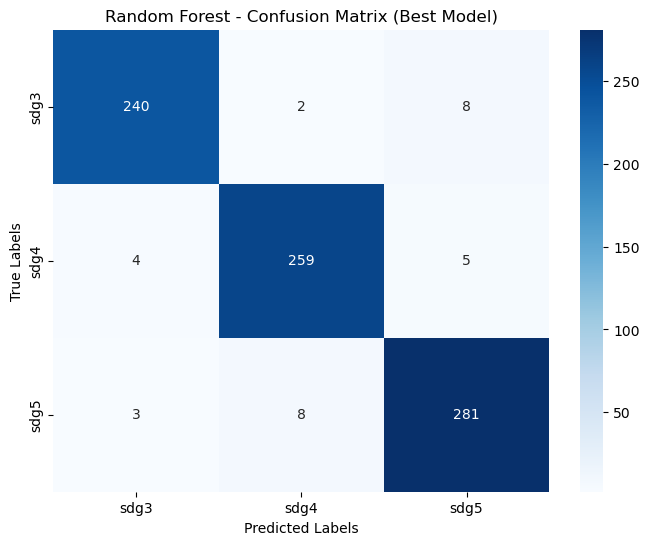

Best hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Exactitud sobre test: 0.96

XGboost Classifier Report (Best Model):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       250
           1       0.96      0.94      0.95       268
           2       0.96      0.96      0.96       292

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810



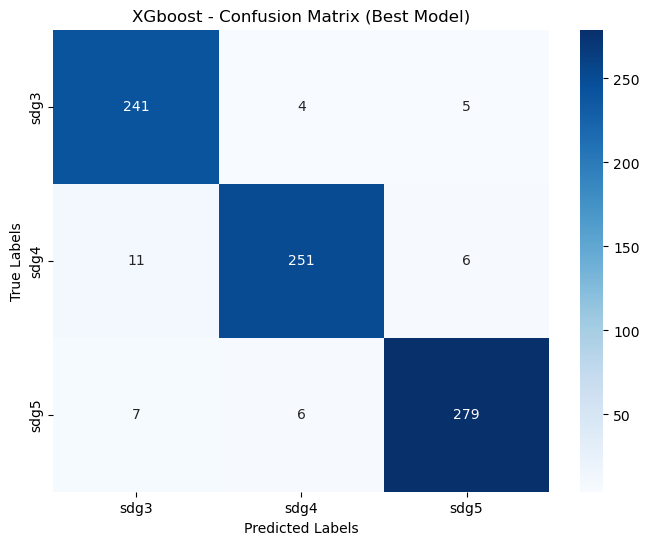

Best hyperparameters for XGboost: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Exactitud sobre test: 0.95

NeuralNet Classifier Report (Best Model):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.97      0.97      0.97       268
           2       0.98      0.97      0.97       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



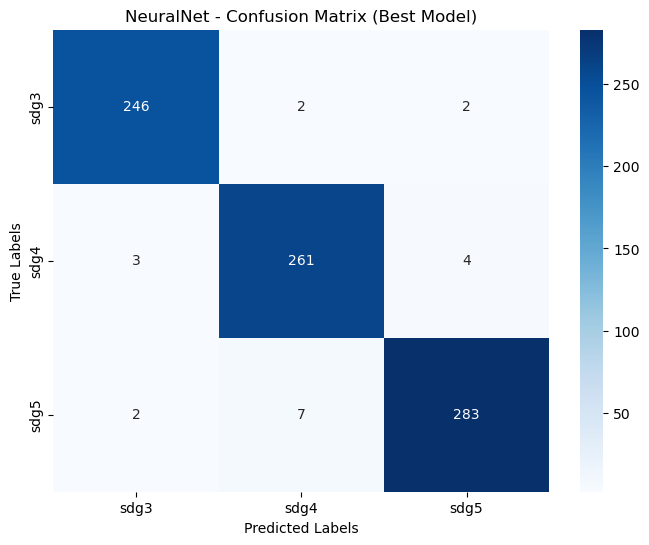

Best hyperparameters for NeuralNet: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}
Exactitud sobre test: 0.98


In [12]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# Definir los hiperparámetros a optimizar para cada modelo
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski','euclidean', 'manhattan']
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'Random Forest': {
        'criterion':['gini', 'entropy'],
        'n_estimators': [50, 100, 200],
        'max_depth': [1, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'XGboost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'NeuralNet': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}



# Recorrer los modelos y realizar la búsqueda de hiperparámetros
for name, model in models.items():
    
    # Seleccionar el tipo de búsqueda de hiperparámetros (GridSearchCV o RandomizedSearchCV)
    if name in ['KNN', 'Naive Bayes']:
        search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    else:
        search = RandomizedSearchCV(model, param_grids[name], n_iter=15, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    
    # Entrenar el modelo con búsqueda de hiperparámetros
    search.fit(X_train, y_train)
    
    # Mejor modelo encontrado
    best_model = search.best_estimator_
    
    # Predecir con el mejor modelo
    y_pred = best_model.predict(X_test)
    
    # Evaluar el mejor modelo
    print(f"\n{name} Classifier Report (Best Model):")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['sdg3', 'sdg4', 'sdg5'], yticklabels=['sdg3', 'sdg4', 'sdg5'])
    plt.title(f'{name} - Confusion Matrix (Best Model)')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()
    
    # Mostrar los mejores hiperparámetros
    print(f"Best hyperparameters for {name}: {search.best_params_}")

    print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred)) 
